# Instagram Reach Exploratory Analysis 

*About the DataSet:* Stats from the acount Statso 
*Link source:* https://statso.io/instagram-reach-analysis-case-study/
*Year date:* 2022

### 00 Loading The Libraries and DataSet

In [36]:
#Exporting the libraries
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

pio.templates.default = "plotly_dark"
plt.style.use('dark_background')

In [37]:
#Exporting the data
df = pd.read_csv(r"F:\00. Data-Analytics-Projects\001. Exploratory Data Analysis\00. Data\Instagram data.csv",encoding='latin-1')

### 00 First Approach on the DataSet:
First of all, I want to examine the dataset and its features to understand what this data is about. I will then want to formulate at least five research questions based on the dataset.

**A preliminary set of questions to describe the context of the dataset are:**

* What is the main subject or theme of this data?
* What does the dataset contain in terms of information?
* What potential uses or applications could this data have?
* Who could benefit from utilizing this dataset?

In [38]:
df.head(10)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#financeï¿½#moneyï¿½#businessï¿½#investingï¿½#...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcareï¿½#healthï¿½#covidï¿½#dataï¿½#data...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#dataï¿½#datascienceï¿½#dataanalysisï¿½#dataan...
3,4528,2700,621,932,73,172,10,7,213,23,8,Hereï¿½s how you can write a Python program to...,#pythonï¿½#pythonprogrammingï¿½#pythonprojects...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualizationï¿½#datascienceï¿½#dataï¿½#d...
5,3884,2046,1214,329,43,74,7,10,144,9,2,Here are some of the most important soft skill...,#dataï¿½#datascienceï¿½#dataanalysisï¿½#dataan...
6,2621,1543,599,333,25,22,5,1,76,26,0,Learn how to analyze a candlestick chart as a ...,#stockmarketï¿½#investingï¿½#stocksï¿½#trading...
7,3541,2071,628,500,60,135,4,9,124,12,6,Here are some of the best books that you can f...,#pythonï¿½#pythonprogrammingï¿½#pythonprojects...
8,3749,2384,857,248,49,155,6,8,159,36,4,Here are some of the best data analysis projec...,#dataanalyticsï¿½#datascienceï¿½#dataï¿½#machi...
9,4115,2609,1104,178,46,122,6,3,191,31,6,Here are two best ways to count the number of ...,#pythonï¿½#pythonprogrammingï¿½#pythonprojects...


### 01 Context Q&A: 
  * What is the main subject or theme of this data?
*->This data is about various Instagram posts and their corresponding statistics on the account Statso*
  * What does the dataset contain in terms of information?
*->The dataset contains information about several Instagram posts. Each post is associated with specific metrics like impressions, interactions from different sources (home, hashtags, explore, other), saves, comments, shares, likes, profile visits, and follows. Additionally, it includes the caption and hashtags used in each post.*
  * What potential uses or applications could this data have?
*->This data can be useful for analyzing post performance, understanding audience behavior, and improving content strategies on Instagram.*
  * Who could benefit from utilizing this dataset?
*->The account owner, the Statso Org, the marketing team, competitors (?), etc.*

### 02 Dataset Stats: Descriptive Analysis

In [39]:
#Let's check for blank or null values

df.info()
print("+"+"="*60+"+")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB
+============================================================+
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0


In [40]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()
impressions = df["Impressions"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(df, values=values, names=labels, 
             title = 'Impression on Instagram Posts By Source', hole = 0.5)
fig.show()


In [41]:
imp_percent=((home+hashtags+explore)/impressions)*100
print(f"{round(imp_percent,2)}% of impresions come from the instagram home, the hastags and lastly the instagram explore view")
print("+"+"="*60+"+")
print("So, I will analyse the stats of the three components")


95.4% of impresions come from the instagram home, the hastags and lastly the instagram explore view
+============================================================+
So, I will analyse the stats of the three components


In [42]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


#### Very large standard deviations: 
All three main sources of impresions have a very large stds meaning theay are far away from the mean. This can be translated that we can not asume that the mean is a reliable indicator of impresions for future posts due to significant dispertions of data.  
 

In [43]:
fig_1= px.histogram(df, 
                  x='From Home', 
                  nbins=10, 
                  title='Distribution of Impressions From Home')
fig_2= px.histogram(df, 
                  x='From Hashtags', 
                  nbins=10, 
                  title='Distribution of Impressions From Hashtags')
fig_3= px.histogram(df, 
                  x='From Explore', 
                  nbins=10, 
                  title='Distribution of Impressions From Explore')

In [44]:
fig_1.show()
fig_2.show()
fig_3.show()

In [45]:
df = df.reset_index(drop=True)
df.index = df.index + 1
df = df.rename_axis('nro').reset_index()

In [46]:
df.head()

,nro,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#financeï¿½#moneyï¿½#businessï¿½#investingï¿½#...
1,2,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcareï¿½#healthï¿½#covidï¿½#dataï¿½#data...
2,3,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#dataï¿½#datascienceï¿½#dataanalysisï¿½#dataan...
3,4,4528,2700,621,932,73,172,10,7,213,23,8,Hereï¿½s how you can write a Python program to...,#pythonï¿½#pythonprogrammingï¿½#pythonprojects...
4,5,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualizationï¿½#datascienceï¿½#dataï¿½#d...


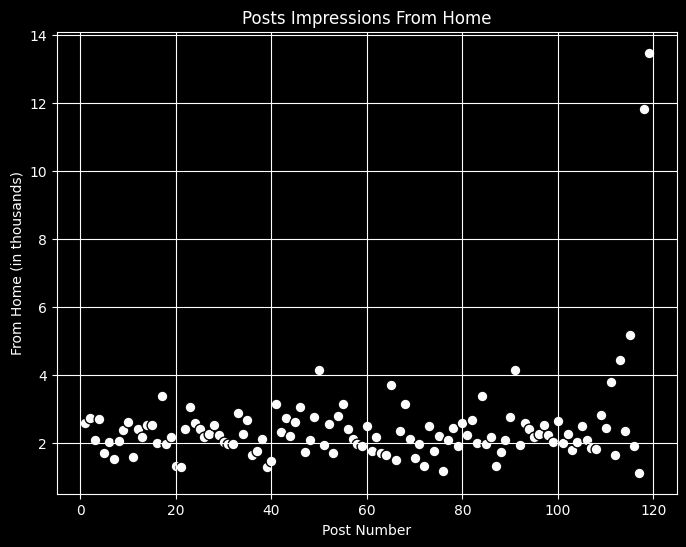

In [47]:
data = df['From Home'] / 1000
point_number = df['nro']

mask = data > 6 

plt.figure(figsize=(8, 6))
plt.scatter(point_number, data, alpha=0.99, color='white', edgecolors='black',s=60)

plt.xlabel('Post Number')
plt.ylabel('From Home (in thousands)')
plt.title('Posts Impressions From Home')
plt.grid(True)

plt.show()

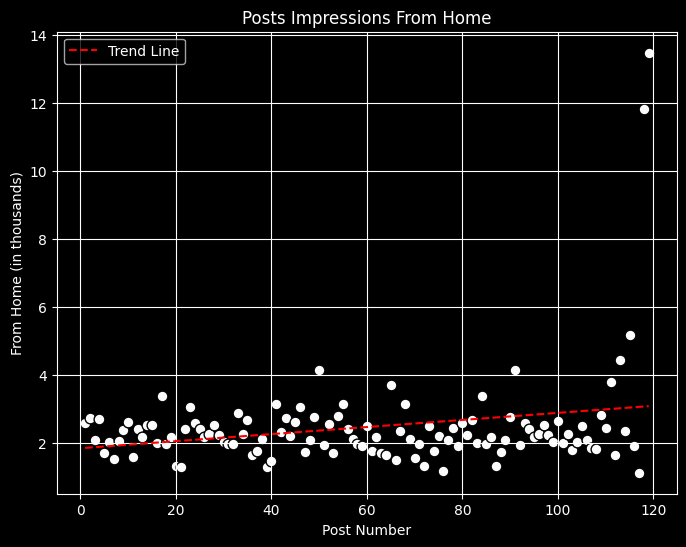

In [48]:
# Assuming you have a pandas DataFrame named 'df' with columns 'From Home' and 'nro'
data = df['From Home'] / 1000
point_number = df['nro']

mask = data > 6

plt.figure(figsize=(8, 6))
plt.scatter(point_number, data, alpha=0.99, color='white', edgecolors='black', s=60)

# Add a trend line (linear regression) to the scatter plot
trend_line_coefficients = np.polyfit(point_number, data, 1)
trend_line = np.polyval(trend_line_coefficients, point_number)
plt.plot(point_number, trend_line, color='red', linestyle='dashed', label='Trend Line')

plt.xlabel('Post Number')
plt.ylabel('From Home (in thousands)')
plt.title('Posts Impressions From Home')
plt.grid(True)
plt.legend()

plt.show()

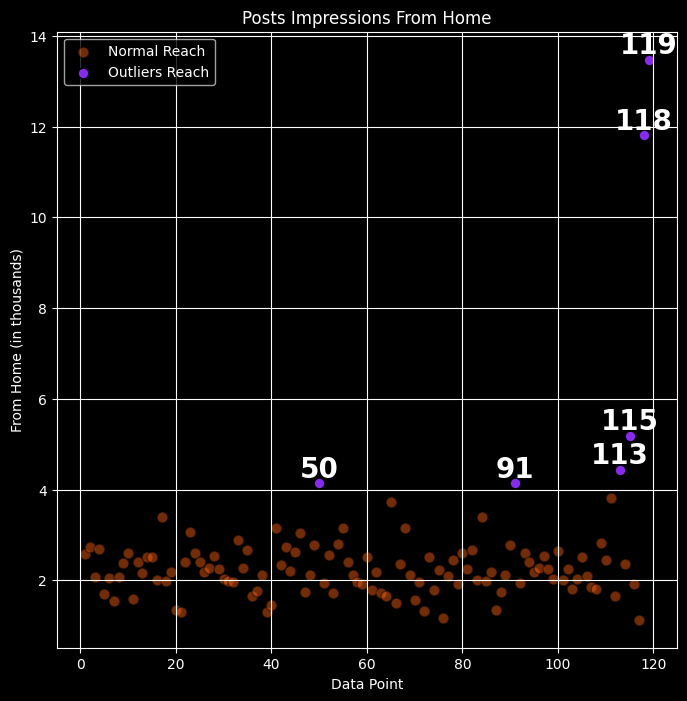

In [49]:
#Scatter Plot From Home
data = df['From Home'] / 1000
point_number = df['nro']

mask = data > 4

plt.figure(figsize=(8, 8))

# Plot the points where data is not greater than 6 with orange color
plt.scatter(point_number[~mask], data[~mask], alpha=0.45, color='#ff6213', edgecolors='black', label='Normal Reach', s=60)

# Plot the points where data is greater than 6 with red color
plt.scatter(point_number[mask], data[mask], alpha=0.99, color='#892cef', edgecolors='black', label='Outliers Reach', s=60)

# Annotate the data point numbers for outliers
for x, y, nro in zip(point_number[mask], data[mask], df['nro'][mask]):
    plt.text(x, y, str(nro), ha='center', va='bottom', fontsize=20, color='white', weight='bold')

plt.xlabel('Data Point')
plt.ylabel('From Home (in thousands)')
plt.title('Posts Impressions From Home')
plt.grid(True)
plt.legend()

plt.show()

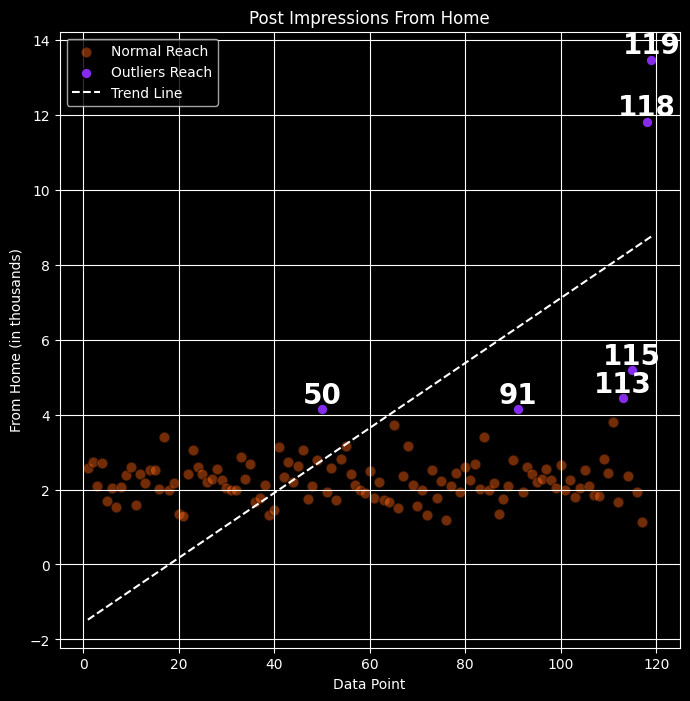

In [65]:
data = df['From Home'] / 1000
point_number = df['nro']

mask = data > 4

plt.figure(figsize=(8, 8))

# Plot the points where data is not greater than 6 with orange color
plt.scatter(point_number[~mask], data[~mask], alpha=0.45, color='#ff6213', edgecolors='black', label='Normal Reach', s=60)

# Plot the points where data is greater than 6 with red color
plt.scatter(point_number[mask], data[mask], alpha=0.99, color='#892cef', edgecolors='black', label='Outliers Reach', s=60)

# Annotate the data point numbers for outliers
for x, y, nro in zip(point_number[mask], data[mask], df['nro'][mask]):
    plt.text(x, y, str(nro), ha='center', va='bottom', fontsize=20, color='white', weight='bold')
    
# Add a trend line (linear regression) to the scatter plot
trend_line_coefficients = np.polyfit(point_number[mask], data[mask], 1)
trend_line = np.polyval(trend_line_coefficients, point_number)
plt.plot(point_number, trend_line, color='white', linestyle='dashed', label='Trend Line')

plt.xlabel('Data Point')
plt.ylabel('From Home (in thousands)')
plt.title('Post Impressions From Home')
plt.grid(True)
plt.legend()

plt.show()

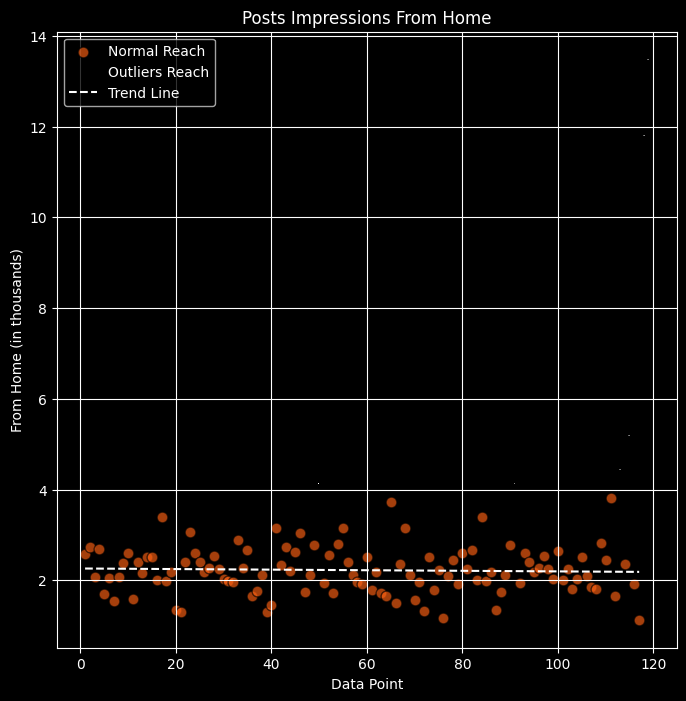

In [66]:
# Assuming you have a pandas DataFrame named 'df' with columns 'From Home' and 'nro'
data = df['From Home'] / 1000
point_number = df['nro']

mask = data > 4

plt.figure(figsize=(8, 8))

# Plot the points where data is not greater than 4 with orange color
plt.scatter(point_number[~mask], data[~mask], alpha=0.65, color='#ff6213', edgecolors='black', label='Normal Reach', s=60)

# Plot the points where data is greater than 4 with red color
plt.scatter(point_number[mask], data[mask], alpha=0.0, color='#892cef', edgecolors='black', label='Outliers Reach', s=60)

# Annotate the data point numbers for outliers
for x, y, nro in zip(point_number[mask], data[mask], df['nro'][mask]):
    plt.text(x, y, str(nro), ha='center', va='bottom', fontsize=0, color='white', weight='bold')

# Filter out the outlier points for the trend line
filtered_point_number = point_number[~mask]
filtered_data = data[~mask]

# Calculate the trend line coefficients using the filtered data
trend_line_coefficients = np.polyfit(filtered_point_number, filtered_data, 1)

# Generate the y-values of the trend line based on the filtered x-values
trend_line = np.polyval(trend_line_coefficients, filtered_point_number)

# Plot the trend line with the filtered data
plt.plot(filtered_point_number, trend_line, color='white', linestyle='dashed', label='Trend Line')

plt.xlabel('Data Point')
plt.ylabel('From Home (in thousands)')
plt.title('Posts Impressions From Home')
plt.grid(True)
plt.legend()

plt.show()

In [52]:
filtered_data_1 = filtered_data *1000
filtered_data_1.describe()

count     113.000000
mean     2225.070796
std       515.649256
min      1133.000000
25%      1926.000000
50%      2190.000000
75%      2541.000000
max      3813.000000
Name: From Home, dtype: float64

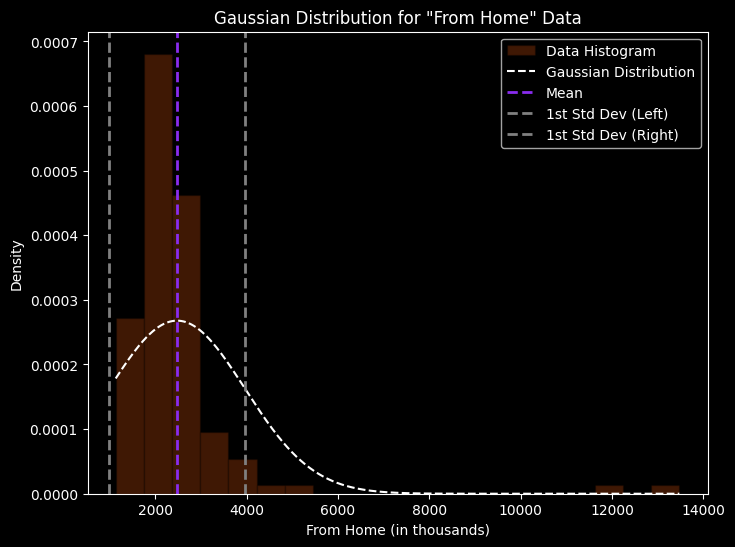

In [67]:
data = df['From Home']

# Calculate mean and standard deviation
mean = data.mean()
std = data.std()

# Generate data points for the Gaussian distribution
x = np.linspace(data.min(), data.max(), 1000)
pdf = norm.pdf(x, mean, std)

# Plot the histogram of 'From Home' data
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, density=True, alpha=0.25, color='#ff6213', edgecolor='black', label='Data Histogram')

# Plot the Gaussian distribution
plt.plot(x, pdf, color='white', linestyle='dashed', label='Gaussian Distribution')

# Add vertical lines for mean and left/right first standard deviations
plt.axvline(mean, color='#892cef', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean - std, color='grey', linestyle='dashed', linewidth=2, label='1st Std Dev (Left)')
plt.axvline(mean + std, color='grey', linestyle='dashed', linewidth=2, label='1st Std Dev (Right)')

plt.xlabel('From Home (in thousands)')
plt.ylabel('Density')
plt.title('Gaussian Distribution for "From Home" Data')
plt.legend()

plt.show()

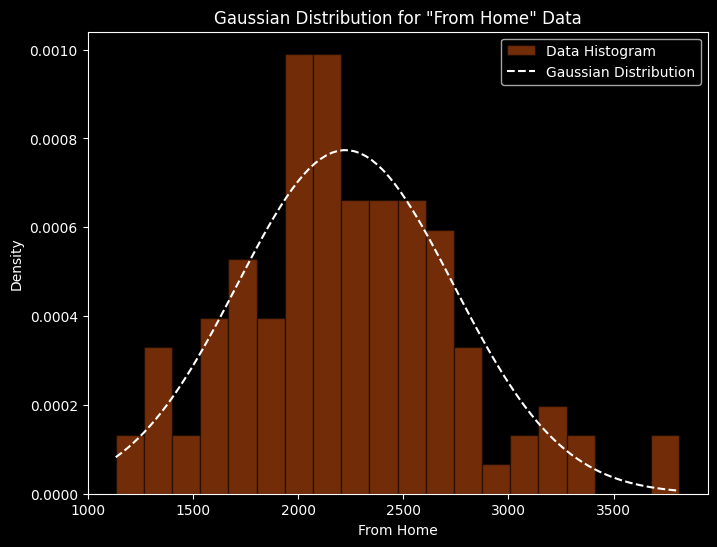

In [55]:
# Calculate mean and standard deviation
mean = filtered_data_1.mean()
std = filtered_data_1.std()

# Generate data points for the Gaussian distribution
x = np.linspace(filtered_data_1.min(), filtered_data_1.max(), 100)
pdf = norm.pdf(x, mean, std)

# Plot the histogram of 'From Home' data
plt.figure(figsize=(8, 6))
plt.hist(filtered_data_1, bins=20, density=True, alpha=0.45, color='#ff6213', edgecolor='black', label='Data Histogram')

# Plot the Gaussian distribution
plt.plot(x, pdf, color='white', linestyle='dashed', label='Gaussian Distribution')

plt.xlabel('From Home')
plt.ylabel('Density')
plt.title('Gaussian Distribution for "From Home" Data')
plt.legend()

plt.show()

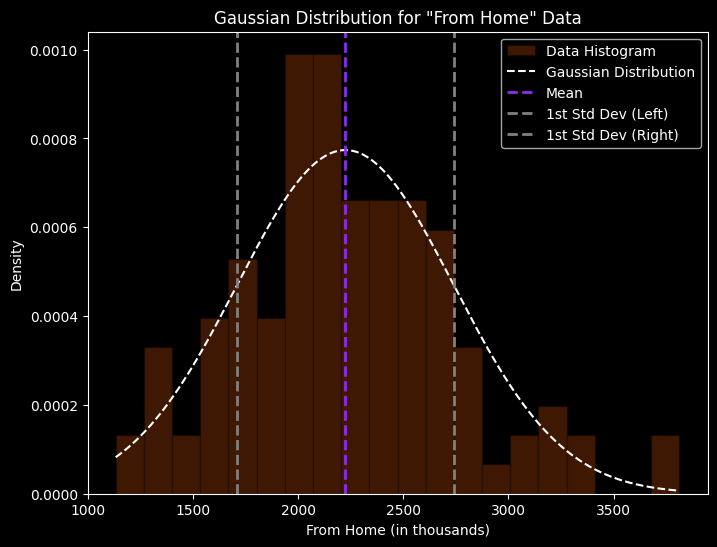

In [64]:
data = filtered_data_1.copy()

# Calculate mean and standard deviation
mean = data.mean()
std = data.std()

# Generate data points for the Gaussian distribution
x = np.linspace(data.min(), data.max(), 1000)
pdf = norm.pdf(x, mean, std)

# Plot the histogram of 'From Home' data
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, density=True, alpha=0.25, color='#ff6213', edgecolor='black', label='Data Histogram')

# Plot the Gaussian distribution
plt.plot(x, pdf, color='white', linestyle='dashed', label='Gaussian Distribution')

# Add vertical lines for mean and left/right first standard deviations
plt.axvline(mean, color='#892cef', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean - std, color='grey', linestyle='dashed', linewidth=2, label='1st Std Dev (Left)')
plt.axvline(mean + std, color='grey', linestyle='dashed', linewidth=2, label='1st Std Dev (Right)')

plt.xlabel('From Home (in thousands)')
plt.ylabel('Density')
plt.title('Gaussian Distribution for "From Home" Data')
plt.legend()

plt.show()